In [1]:
autosave 0

Autosave disabled


# Szükséges library-k importálása

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Adatfájl beolvasása, X és Y tengely létrehozása

In [3]:
dataset = pd.read_csv('lakás árak Szolnok.csv')
X = dataset.iloc[0: ,0].values
Y = dataset.iloc[0: ,1].values

# Az adatok szétbontása 'Training' és 'Test' szettre

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

X_train1 = np.reshape(X_train, (-1,1))
Y_train1 = np.reshape(Y_train, (-1,1))

X_test1 = np.reshape(X_test, (-1,1))
Y_test1 = np.reshape(Y_test, (-1,1))

# Modell létrehozása, R-négyzet érték kiszámítása

In [5]:
lin_regressor = LinearRegression()
lin_regressor.fit(X_train1, Y_train1)

y_pred_test1 = lin_regressor.predict(X_test1)
y_pred_train1 = lin_regressor.predict(X_train1) 
    
r_square_test1 = r2_score(Y_test1, y_pred_test1)
r_square_train1 = r2_score(Y_train1, y_pred_train1)

# Plottolás: eredeti adatok, training és test adatok R-négyzet értékkel

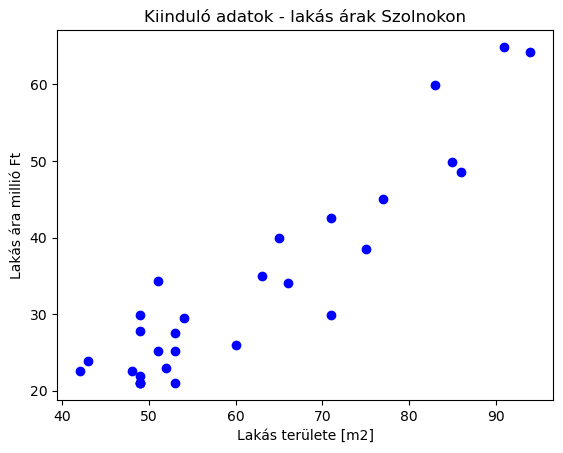

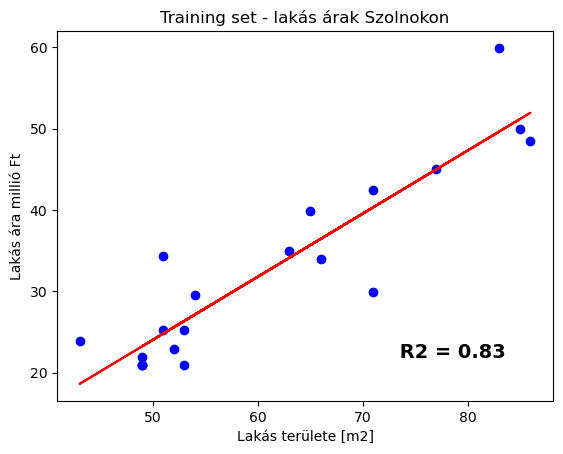

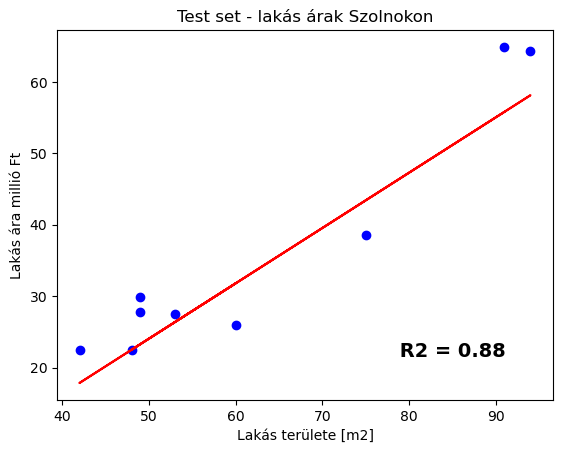

In [6]:
plt.scatter(X, Y, c='blue')
plt.title('Kiinduló adatok - lakás árak Szolnokon')
plt.xlabel('Lakás területe [m2]')
plt.ylabel('Lakás ára millió Ft')
plt.show() 

plt.scatter(X_train1, Y_train1, c='blue')
plt.plot(X_train1, y_pred_train1, c='red')
plt.title('Training set - lakás árak Szolnokon')
plt.xlabel('Lakás területe [m2]')
plt.ylabel('Lakás ára millió Ft')
plt.figtext(0.65, 0.2, f' R2 = {r_square_train1:.2f}', fontweight='bold', fontsize=14)
plt.show()

plt.scatter(X_test1, Y_test1, c='blue')
plt.plot(X_test1, y_pred_test1, c='red')
plt.title('Test set - lakás árak Szolnokon')
plt.xlabel('Lakás területe [m2]')
plt.ylabel('Lakás ára millió Ft')
plt.figtext(0.65, 0.2, f' R2 = {r_square_test1:.2f}', fontweight='bold', fontsize=14)
plt.show()  

# Predikció készítése a 30-150 m2 alapterületű lakás árakra

In [7]:
area = [x for x in range(30, 151)]
tran_area = np.reshape(area, (121,1))
pred_price = lin_regressor.predict(tran_area)
result_array = np.column_stack((tran_area, pred_price))

tran_area = tran_area.flatten()
pred_price = pred_price.flatten().round(2)

In [8]:
df = pd.DataFrame({'Terület [m2]': tran_area, 'Ár millió Ft': pred_price})

# Predikció nyomtatása táblázatba

In [9]:
pd.set_option('display.max_rows', None)

df

,Terület [m2],Ár millió Ft
0,30,8.56
1,31,9.34
2,32,10.11
3,33,10.89
4,34,11.66
5,35,12.43
6,36,13.21
7,37,13.98
8,38,14.76
9,39,15.53


# Táblázat mentése Excel fájlba

In [10]:
df.to_excel("Szolnoki lakás árak predikció.xlsx", index=False)